In [1]:
import qutip as qt
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from importlib import reload
import qims as qims
import scqubits as scq


In [ ]:
sx = qt.sigmax()
sy = qt.sigmay()
sz = qt.sigmaz()

#------------------------------------------------------
op_data = {"op_types": [["sx",sx],["sy",sy],["sz",sz]],
           "op_sequence": [sx,sy,sx,sy,sy,sx,sy,sx]}#[sx,sy]}#qims.dd_protocols('Chiral')}

#------------------------------------------------------
drive_prms = {"amplitudes": np.pi/(2*0.1),
              "widths": 0.1,
              "frequencies":0,
              "tlocs":  np.linspace(0,1,len(op_data["op_sequence"])),
              "phases": 0}

static_prms = {"h0" : "fluxonium",
               "flux": 0.54,
               "cutoff": 100}
#------------------------------------------------------
prms = {"period": 1,#2.0408,
        "op_data": op_data,
        "drive_prms": drive_prms,
        "static_prms": static_prms}
#------------------------------------------------------


(evecs, evals), HF = qims.FloquetSpectrum(qims.qubit_hamiltonian, prms, nsteps = 100000)

In [ ]:
scan = []
ph_list = np.linspace(0.48,0.52,30)
dt_list = np.array([0.01,0.1,0.5])
scanT = []
for dt in tqdm(dt_list):
    scan = []
    for ph in ph_list:
        prms["static_prms"]["flux"] = ph
        prms["drive_prms"]["widths"] = dt
        prms["drive_prms"]["amplitudes"] = [np.pi/(2*dt)]
        prms["period"] = 5#np.max(dt_list)
        (evecs, evals), HF = qims.FloquetSpectrum(qims.qubit_hamiltonian, prms, nsteps = 100000)
        scan.append(np.sort(evals)[1])
    scanT.append(scan)

In [ ]:
[plt.plot(scanT[r],label = str(dt_list[r])) for r in range(len(scanT))]
plt.legend()

In [ ]:
[plt.plot(scanT[r],label = str(dt_list[r])) for r in range(len(scanT))]
plt.legend()

# plt.ylim([0,3])

In [ ]:
plt.plot(scan)

In [ ]:
tlist = np.linspace(0,prms["period"],150)
f_modes_table_t = qt.floquet_modes_table(evecs, evals, tlist, HF, prms["period"], args=prms)

In [ ]:
evecs

In [ ]:
evals/(2*np.pi/prms["period"])

In [ ]:
def flz(m):
    sm = 0
    for i in range(len(f_modes_table_t)):
        evecs_t = f_modes_table_t[i]
        sm = sm +np.exp(1j*m*tlist[i]*2*np.pi/prms["period"])*((sz/2)*(evecs_t[0]*evecs_t[0].dag()-evecs_t[1]*evecs_t[1].dag())).tr()
    return np.mean(np.diff(tlist))*sm/prms["period"]

In [ ]:
scan = []
for m in tqdm(range(-int(len(tlist)/2),int(len(tlist)/2))):
    scan.append(flz(m))

In [ ]:
mlist = np.arange(-int(len(tlist)/2),int(len(tlist)/2))
plt.plot(mlist,np.abs(scan),'.-')
# plt.xlim([-10,10])

In [ ]:
hbar = 6.62*(10**(-34))/(2*np.pi)
hplanck = 6.62*(10**(-34))
TandC = 1.1*(10**(-6))
df = 1.8*(10**(-6))
phige = 2
EC = 0.5*(10**9)*hplanck
EL = 1.3*(10**9)*hplanck 
Ad = (np.pi**2)*TandC*phige**2/EC
Af = 2*np.pi*df*EL*np.abs(phige)

def Sf(w):
    return ((Af**2)/(hbar**2))*np.abs(((2*np.pi)/w))

In [ ]:
sm = 0
for m in tqdm(range(-int(len(tlist)/2),int(len(tlist)/2))):
    if m ==0:
        sm = sm + 4*Af*2*np.abs(flz(0))    
    if m != 0:
        sm = sm + 2*Sf(m*(2*np.pi/(prms["period"]*(10**-9))))*(np.abs(flz(m))**2)

In [ ]:
np.abs(flz(0))

In [ ]:
1/(4*Af*2*np.abs(flz(0))  )

In [ ]:
(1/sm)

In [ ]:


sx = qt.sigmax()
sy = qt.sigmay()
sz = qt.sigmaz()

static_prms = {"h0" : "fluxonium",
               "flux": 0.5,
               "cutoff": 100}

op_data = {"op_types": [["sx",sx],["sy",sy],["sz",sz]],
           "op_sequence": [sx,sy]}#qims.dd_protocols('Chiral')}

drive_prms = {"amplitudes": [np.pi/(2*0.01)],
              "widths": 0.01,
              "frequencies":[0],
              "tlocs": 0.5,#np.linspace(0,1,len(op_data["op_sequence"])),
              "phases": 0}

prms = {"period": 1.0,
        "op_data": op_data,
        "drive_prms": drive_prms,
        "static_prms": static_prms}

dt_list = np.array([0.01,0.1,1])
ph_list = np.linspace(0.48,0.52,19)
amp_list = np.array([0,1])
tlist = np.linspace(0,prms["period"],100)

w_list = []
flatness = []
data = {}
for dt in tqdm(dt_list): #[0.001]:
    tmp = []
    for amp in amp_list:
        prms["drive_prms"]["widths"] = dt
        prms["drive_prms"]["amplitudes"] = [amp*np.pi/(2*dt)]
        prms["period"] = 10*dt#np.max(dt_list)
        scan = []
        for ph in ph_list:
            prms["static_prms"]["flux"] = ph
            (evecs, evals), HF = qims.FloquetSpectrum(qims.qubit_hamiltonian, prms, nsteps = 100000)
            
            
            f_modes_table_t = qt.floquet_modes_table(evecs, evals, tlist, HF, prms["period"], args=prms)
            
            scan = []
            for m in range(-int(len(tlist)/2),int(len(tlist)/2)):
                scan.append(flz(m))
            sm = 0
            for m in range(-int(len(tlist)/2),int(len(tlist)/2)):
                if m ==0:
                    sm = sm + 4*Af*2*np.abs(flz(0))
                if m != 0:
                    sm = sm + 2*Sf(m*(2*np.pi/(prms["period"]*(10**-9))))*(np.abs(flz(m))**2)
            
            data["evals",dt,amp,ph]=evals
            data["evecs",dt,amp,ph]=evecs
            data["Tphi",dt,amp,ph]=1/sm
            data["flz",dt,amp,ph]=scan
            np.savetxt("Monitor.txt",[np.where(dt==dt_list)[0][0]/len(dt_list),\
                                      np.where(amp==amp_list)[0][0]/len(amp_list),
                                      np.where(ph==ph_list)[0][0]/len(ph_list)])
            
            scan.append(np.sort(evals)[1])
        tmp.append(np.sum(np.abs(np.diff(scan))))
    flatness.append(tmp)



In [ ]:
np.where(dt==dt_list)[0][0]/len(dt_list)

In [ ]:
[plt.plot(ph_list,[data["Tphi",dt,amp_list[0],ph] for ph in ph_list], label = str(dt)) for dt in dt_list]
plt.legend()
plt.yscale('log')

In [ ]:
hbar = 6.62*(10**(-34))/(2*np.pi)
hplanck = 6.62*(10**(-34))
TandC = 1.1*(10**(-6))
df = 1.8*(10**(-6))
phige = 2
EC = 0.5*(10**9)*hplanck
EL = 1.3*(10**9)*hplanck 
Ad = (np.pi**2)*TandC*phige**2/EC
Af = 2*np.pi*df*EL*np.abs(phige)

def Sf(w):
    return ((Af**2)/(hbar**2))*np.abs(((2*np.pi)/w))

In [ ]:
sm = 0
for m in tqdm(range(-int(len(tlist)/2),int(len(tlist)/2))):
    if m ==0:
        sm = sm + 4*Af*2*np.abs(flz(0))    
    if m != 0:
        sm = sm + 2*Sf(m*(2*np.pi/(prms["period"]*(10**-9))))*(np.abs(flz(m))**2)

In [ ]:
np.abs(flz(0))

In [ ]:
1/(4*Af*2*np.abs(flz(0))  )

In [ ]:
(1/sm)

In [ ]:


sx = qt.sigmax()
sy = qt.sigmay()
sz = qt.sigmaz()

static_prms = {"h0" : "fluxonium",
               "flux": 0.5,
               "cutoff": 100}

op_data = {"op_types": [["sx",sx],["sy",sy],["sz",sz]],
           "op_sequence": [sx,sy]}#qims.dd_protocols('Chiral')}

drive_prms = {"amplitudes": [np.pi/(2*0.01)],
              "widths": 0.01,
              "frequencies":[0],
              "tlocs": 0.5,#np.linspace(0,1,len(op_data["op_sequence"])),
              "phases": 0}

prms = {"period": 1.0,
        "op_data": op_data,
        "drive_prms": drive_prms,
        "static_prms": static_prms}

dt_list = np.array([0.01,0.1,1])
ph_list = np.linspace(0.48,0.52,19)
amp_list = np.array([0,1])
tlist = np.linspace(0,prms["period"],100)

w_list = []
flatness = []
data = {}
for dt in tqdm(dt_list): #[0.001]:
    tmp = []
    for amp in amp_list:
        prms["drive_prms"]["widths"] = dt
        prms["drive_prms"]["amplitudes"] = [amp*np.pi/(2*dt)]
        prms["period"] = 10*dt#np.max(dt_list)
        scan = []
        for ph in ph_list:
            prms["static_prms"]["flux"] = ph
            (evecs, evals), HF = qims.FloquetSpectrum(qims.qubit_hamiltonian, prms, nsteps = 100000)
            
            
            f_modes_table_t = qt.floquet_modes_table(evecs, evals, tlist, HF, prms["period"], args=prms)
            
            scan = []
            for m in range(-int(len(tlist)/2),int(len(tlist)/2)):
                scan.append(flz(m))
            sm = 0
            for m in range(-int(len(tlist)/2),int(len(tlist)/2)):
                if m ==0:
                    sm = sm + 4*Af*2*np.abs(flz(0))
                if m != 0:
                    sm = sm + 2*Sf(m*(2*np.pi/(prms["period"]*(10**-9))))*(np.abs(flz(m))**2)
            
            data["evals",dt,amp,ph]=evals
            data["evecs",dt,amp,ph]=evecs
            data["Tphi",dt,amp,ph]=1/sm
            data["flz",dt,amp,ph]=scan
            np.savetxt("Monitor.txt",[np.where(dt==dt_list)[0][0]/len(dt_list),\
                                      np.where(amp==amp_list)[0][0]/len(amp_list),
                                      np.where(ph==ph_list)[0][0]/len(ph_list)])
            
            scan.append(np.sort(evals)[1])
        tmp.append(np.sum(np.abs(np.diff(scan))))
    flatness.append(tmp)



In [ ]:
np.where(dt==dt_list)[0][0]/len(dt_list)

In [ ]:
[plt.plot(ph_list,[data["Tphi",dt,amp_list[0],ph] for ph in ph_list], label = str(dt)) for dt in dt_list]
plt.legend()
plt.yscale('log')

In [ ]:
evecs_t = qt.floquet_modes_t(evecs, evals, t, HF, prms["period"], args=prms)

def flz(t):
    
    return (sz*(evecs_t[0]*evecs_t[0].dag()-evecs_t[1]*evecs_t[1].dag())).tr()

In [ ]:
import scipy.integrate as integrate
integrate.quad(lambda t: flz(t), 0, prms["period"])


In [ ]:
ts = np.linspace(0, prms["period"],500)
np.sum([flz(t) for t in ts])*np.mean(np.diff(ts))

In [ ]:
ts = np.linspace(0, 2*np.pi/prms["period"],1000)
np.sum([flz(t) for t in ts])*np.mean(np.diff(ts))

In [ ]:
evecs, evals

In [ ]:
options = qt.Options()
options.nsteps = 100000
qt.floquet_modes([qims.qubit_hamiltonian(prms["static_prms"]),[sy,qims.drive_sy]], prms['period'], args=prms,options=options)[1]/

In [ ]:
qims.qubit_hamiltonian(prms["static_prms"])

In [ ]:
tlist = np.linspace(0,prms["period"],400)
plt.plot(tlist,[qims.drive_sx(t,prms) for t in tlist],'.')
# plt.plot(tlist,[qims.drive_sy(t,prms) for t in tlist],'.')
# plt.plot(tlist,[qims.drive_sz(t,prms) for t in tlist],'.')

In [ ]:
np.sum([qims.drive_sx(t,prms) for t in tlist])*np.mean(np.diff(tlist))

In [ ]:
evals

In [ ]:
ph_list = np.linspace(0.48,0.52,40)



sweeps = {"flux":ph_list,  "widths": dt_list}

In [ ]:
list(sweeps.keys())

In [ ]:
evecs, evals = qims.FloquetSpectrum(qims.qubit_hamiltonian, prms, nsteps = 1000)

In [ ]:
sx = qt.sigmax()
sy = qt.sigmay()
sz = qt.sigmaz()

static_prms = {"h0" : "fluxonium",
               "flux": 0.5,
               "cutoff": 100}

op_data = {"op_types": [["sx",sx],["sy",sy],["sz",sz]],
           "op_sequence": qims.dd_protocols('Chiral')} 

drive_prms = {"amplitudes": [np.pi/(2*0.01)],
              "widths": 0.01,
              "frequencies":[0],
              "tlocs": 0.5,#np.linspace(0,1,len(op_data["op_sequence"])),
              "phases": 0}

prms = {"period": 1.0,
        "op_data": op_data,
        "drive_prms": drive_prms,
        "static_prms": static_prms}

dt_list = np.linspace(0.01,1,10)
ph_list = np.linspace(0.48,0.52,20)
amp_list = np.linspace(0,1,10)
w_list = []
flatness = []
for dt in tqdm(dt_list): #[0.001]:
    tmp = []
    for amp in amp_list:
        prms["drive_prms"]["widths"] = dt
        prms["drive_prms"]["amplitudes"] = [amp*np.pi/(2*dt)]
        prms["period"] = 10*dt#np.max(dt_list)
        scan = []
        for ph in ph_list:
            prms["static_prms"]["flux"] = ph
            evecs, evals = qims.FloquetSpectrum(qims.qubit_hamiltonian, prms, nsteps = 20000)[0]
            scan.append(np.sort(evals)[1])
        tmp.append(np.sum(np.abs(np.diff(scan))))
    flatness.append(tmp)

In [ ]:
evals/(2*np.pi/prms["period"])

In [ ]:
def flz(m):
    sm = 0
    for i in range(len(f_modes_table_t)):
        evecs_t = f_modes_table_t[i]
        sm = sm +np.exp(1j*m*tlist[i]*2*np.pi/prms["period"])*((sz/2)*(evecs_t[0]*evecs_t[0].dag()-evecs_t[1]*evecs_t[1].dag())).tr()
    return np.mean(np.diff(tlist))*sm/prms["period"]

In [ ]:
scan = []
for m in tqdm(range(-int(len(tlist)/2),int(len(tlist)/2))):
    scan.append(flz(m))

In [ ]:
mlist = np.arange(-int(len(tlist)/2),int(len(tlist)/2))
plt.plot(mlist,np.abs(scan),'.-')
# plt.xlim([-10,10])

In [ ]:
hbar = 6.62*(10**(-34))/(2*np.pi)
hplanck = 6.62*(10**(-34))
TandC = 1.1*(10**(-6))
df = 1.8*(10**(-6))
phige = 2
EC = 0.5*(10**9)*hplanck
EL = 1.3*(10**9)*hplanck 
Ad = (np.pi**2)*TandC*phige**2/EC
Af = 2*np.pi*df*EL*np.abs(phige)

def Sf(w):
    return ((Af**2)/(hbar**2))*np.abs(((2*np.pi)/w))

In [ ]:
sm = 0
for m in tqdm(range(-int(len(tlist)/2),int(len(tlist)/2))):
    if m ==0:
        sm = sm + 4*Af*2*np.abs(flz(0))    
    if m != 0:
        sm = sm + 2*Sf(m*(2*np.pi/(prms["period"]*(10**-9))))*(np.abs(flz(m))**2)

In [ ]:
np.abs(flz(0))

In [ ]:
1/(4*Af*2*np.abs(flz(0))  )

In [ ]:
(1/sm)

In [ ]:


sx = qt.sigmax()
sy = qt.sigmay()
sz = qt.sigmaz()

static_prms = {"h0" : "fluxonium",
               "flux": 0.5,
               "cutoff": 100}

op_data = {"op_types": [["sx",sx],["sy",sy],["sz",sz]],
           "op_sequence": [sx,sy]}#qims.dd_protocols('Chiral')}

drive_prms = {"amplitudes": [np.pi/(2*0.01)],
              "widths": 0.01,
              "frequencies":[0],
              "tlocs": 0.5,#np.linspace(0,1,len(op_data["op_sequence"])),
              "phases": 0}

prms = {"period": 1.0,
        "op_data": op_data,
        "drive_prms": drive_prms,
        "static_prms": static_prms}

dt_list = np.array([0.01,0.1,1])
ph_list = np.linspace(0.48,0.52,19)
amp_list = np.array([0,1])
tlist = np.linspace(0,prms["period"],100)

w_list = []
flatness = []
data = {}
for dt in tqdm(dt_list): #[0.001]:
    tmp = []
    for amp in amp_list:
        prms["drive_prms"]["widths"] = dt
        prms["drive_prms"]["amplitudes"] = [amp*np.pi/(2*dt)]
        prms["period"] = 10*dt#np.max(dt_list)
        scan = []
        for ph in ph_list:
            prms["static_prms"]["flux"] = ph
            (evecs, evals), HF = qims.FloquetSpectrum(qims.qubit_hamiltonian, prms, nsteps = 100000)
            
            
            f_modes_table_t = qt.floquet_modes_table(evecs, evals, tlist, HF, prms["period"], args=prms)
            
            scan = []
            for m in range(-int(len(tlist)/2),int(len(tlist)/2)):
                scan.append(flz(m))
            sm = 0
            for m in range(-int(len(tlist)/2),int(len(tlist)/2)):
                if m ==0:
                    sm = sm + 4*Af*2*np.abs(flz(0))
                if m != 0:
                    sm = sm + 2*Sf(m*(2*np.pi/(prms["period"]*(10**-9))))*(np.abs(flz(m))**2)
            
            data["evals",dt,amp,ph]=evals
            data["evecs",dt,amp,ph]=evecs
            data["Tphi",dt,amp,ph]=1/sm
            data["flz",dt,amp,ph]=scan
            np.savetxt("Monitor.txt",[np.where(dt==dt_list)[0][0]/len(dt_list),\
                                      np.where(amp==amp_list)[0][0]/len(amp_list),
                                      np.where(ph==ph_list)[0][0]/len(ph_list)])
            
            scan.append(np.sort(evals)[1])
        tmp.append(np.sum(np.abs(np.diff(scan))))
    flatness.append(tmp)



In [ ]:
np.where(dt==dt_list)[0][0]/len(dt_list)

In [ ]:
[plt.plot(ph_list,[data["Tphi",dt,amp_list[0],ph] for ph in ph_list], label = str(dt)) for dt in dt_list]
plt.legend()
plt.yscale('log')

In [408]:
hbar = 6.62*(10**(-34))/(2*np.pi)
hplanck = 6.62*(10**(-34))
TandC = 1.1*(10**(-6))
df = 1.8*(10**(-6))
phige = 2
EC = 0.5*(10**9)*hplanck
EL = 1.3*(10**9)*hplanck 
Ad = (np.pi**2)*TandC*phige**2/EC
Af = 2*np.pi*df*EL*np.abs(phige)

def Sf(w):
    return ((Af**2)/(hbar**2))*np.abs(((2*np.pi)/w))

In [409]:
sm = 0
for m in tqdm(range(-int(len(tlist)/2),int(len(tlist)/2))):
    if m ==0:
        sm = sm + 4*Af*2*np.abs(flz(0))    
    if m != 0:
        sm = sm + 2*Sf(m*(2*np.pi/(prms["period"]*(10**-9))))*(np.abs(flz(m))**2)

  0%|          | 0/150 [00:00<?, ?it/s]

In [387]:
np.abs(flz(0))

0.393035013263566

In [386]:
1/(4*Af*2*np.abs(flz(0))  )

1.6337855897784572e+28

In [410]:
(1/sm)

3.9126884065181304

In [342]:


sx = qt.sigmax()
sy = qt.sigmay()
sz = qt.sigmaz()

static_prms = {"h0" : "fluxonium",
               "flux": 0.5,
               "cutoff": 100}

op_data = {"op_types": [["sx",sx],["sy",sy],["sz",sz]],
           "op_sequence": [sx,sy]}#qims.dd_protocols('Chiral')}

drive_prms = {"amplitudes": [np.pi/(2*0.01)],
              "widths": 0.01,
              "frequencies":[0],
              "tlocs": 0.5,#np.linspace(0,1,len(op_data["op_sequence"])),
              "phases": 0}

prms = {"period": 1.0,
        "op_data": op_data,
        "drive_prms": drive_prms,
        "static_prms": static_prms}

dt_list = np.array([0.01,0.1,1])
ph_list = np.linspace(0.48,0.52,19)
amp_list = np.array([0,1])
tlist = np.linspace(0,prms["period"],100)

w_list = []
flatness = []
data = {}
for dt in tqdm(dt_list): #[0.001]:
    tmp = []
    for amp in amp_list:
        prms["drive_prms"]["widths"] = dt
        prms["drive_prms"]["amplitudes"] = [amp*np.pi/(2*dt)]
        prms["period"] = 10*dt#np.max(dt_list)
        scan = []
        for ph in ph_list:
            prms["static_prms"]["flux"] = ph
            (evecs, evals), HF = qims.FloquetSpectrum(qims.qubit_hamiltonian, prms, nsteps = 100000)
            
            
            f_modes_table_t = qt.floquet_modes_table(evecs, evals, tlist, HF, prms["period"], args=prms)
            
            scan = []
            for m in range(-int(len(tlist)/2),int(len(tlist)/2)):
                scan.append(flz(m))
            sm = 0
            for m in range(-int(len(tlist)/2),int(len(tlist)/2)):
                if m ==0:
                    sm = sm + 4*Af*2*np.abs(flz(0))
                if m != 0:
                    sm = sm + 2*Sf(m*(2*np.pi/(prms["period"]*(10**-9))))*(np.abs(flz(m))**2)
            
            data["evals",dt,amp,ph]=evals
            data["evecs",dt,amp,ph]=evecs
            data["Tphi",dt,amp,ph]=1/sm
            data["flz",dt,amp,ph]=scan
            np.savetxt("Monitor.txt",[np.where(dt==dt_list)[0][0]/len(dt_list),\
                                      np.where(amp==amp_list)[0][0]/len(amp_list),
                                      np.where(ph==ph_list)[0][0]/len(ph_list)])
            
            scan.append(np.sort(evals)[1])
        tmp.append(np.sum(np.abs(np.diff(scan))))
    flatness.append(tmp)



  0%|          | 0/3 [00:00<?, ?it/s]

 /tmp/ipykernel_141864/2109614788.py: 57

KeyboardInterrupt: 

In [340]:
np.where(dt==dt_list)[0][0]/len(dt_list)

0.8

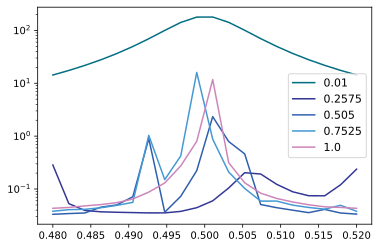

In [325]:
[plt.plot(ph_list,[data["Tphi",dt,amp_list[0],ph] for ph in ph_list], label = str(dt)) for dt in dt_list]
plt.legend()
plt.yscale('log')

In [21]:
evecs_t = qt.floquet_modes_t(evecs, evals, t, HF, prms["period"], args=prms)

def flz(t):
    
    return (sz*(evecs_t[0]*evecs_t[0].dag()-evecs_t[1]*evecs_t[1].dag())).tr()

In [43]:
import scipy.integrate as integrate
integrate.quad(lambda t: flz(t), 0, prms["period"])


(0.0720667076297948, 1.3064075446433954e-08)

In [44]:
ts = np.linspace(0, prms["period"],500)
np.sum([flz(t) for t in ts])*np.mean(np.diff(ts))

0.07213569373301532

In [32]:
ts = np.linspace(0, 2*np.pi/prms["period"],1000)
np.sum([flz(t) for t in ts])*np.mean(np.diff(ts))

0.5379197459778944

In [17]:
evecs, evals

([Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
  Qobj data =
  [[0.71316626+0.j        ]
   [0.0101861 +0.70092091j]],
  Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
  Qobj data =
  [[-0.0101861 +0.70092091j]
   [ 0.71316626+0.j        ]]],
 array([-3.10754257,  3.10754257]))

In [101]:
options = qt.Options()
options.nsteps = 100000
qt.floquet_modes([qims.qubit_hamiltonian(prms["static_prms"]),[sy,qims.drive_sy]], prms['period'], args=prms,options=options)[1]/

array([ 0.48695918, -0.48695918])

In [70]:
qims.qubit_hamiltonian(prms["static_prms"])

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.         0.86420397]
 [0.86420397 0.        ]]

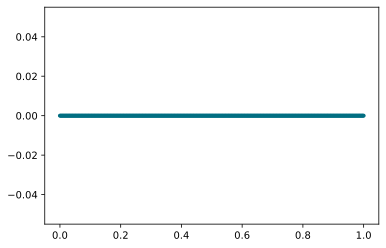

In [110]:
tlist = np.linspace(0,prms["period"],400)
plt.plot(tlist,[qims.drive_sx(t,prms) for t in tlist],'.')
# plt.plot(tlist,[qims.drive_sy(t,prms) for t in tlist],'.')
# plt.plot(tlist,[qims.drive_sz(t,prms) for t in tlist],'.')

In [55]:
np.sum([qims.drive_sx(t,prms) for t in tlist])*np.mean(np.diff(tlist))

3.141592653589794

In [47]:
evals

array([ 3.07798877, -3.07798877])

In [9]:
ph_list = np.linspace(0.48,0.52,40)



sweeps = {"flux":ph_list,  "widths": dt_list}

In [11]:
list(sweeps.keys())

['flux', 'widths']

In [ ]:
evecs, evals = qims.FloquetSpectrum(qims.qubit_hamiltonian, prms, nsteps = 1000)

In [115]:
sx = qt.sigmax()
sy = qt.sigmay()
sz = qt.sigmaz()

static_prms = {"h0" : "fluxonium",
               "flux": 0.5,
               "cutoff": 100}

op_data = {"op_types": [["sx",sx],["sy",sy],["sz",sz]],
           "op_sequence": qims.dd_protocols('Chiral')} 

drive_prms = {"amplitudes": [np.pi/(2*0.01)],
              "widths": 0.01,
              "frequencies":[0],
              "tlocs": 0.5,#np.linspace(0,1,len(op_data["op_sequence"])),
              "phases": 0}

prms = {"period": 1.0,
        "op_data": op_data,
        "drive_prms": drive_prms,
        "static_prms": static_prms}

dt_list = np.linspace(0.01,1,10)
ph_list = np.linspace(0.48,0.52,20)
amp_list = np.linspace(0,1,10)
w_list = []
flatness = []
for dt in tqdm(dt_list): #[0.001]:
    tmp = []
    for amp in amp_list:
        prms["drive_prms"]["widths"] = dt
        prms["drive_prms"]["amplitudes"] = [amp*np.pi/(2*dt)]
        prms["period"] = 10*dt#np.max(dt_list)
        scan = []
        for ph in ph_list:
            prms["static_prms"]["flux"] = ph
            evecs, evals = qims.FloquetSpectrum(qims.qubit_hamiltonian, prms, nsteps = 20000)[0]
            scan.append(np.sort(evals)[1])
        tmp.append(np.sum(np.abs(np.diff(scan))))
    flatness.append(tmp)

  0%|          | 0/10 [00:00<?, ?it/s]

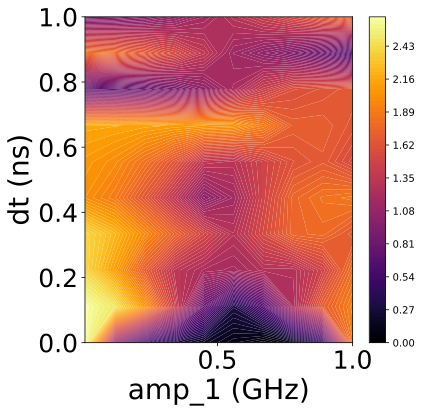

In [114]:

fig, ax = plt.subplots(figsize=(6, 6))

X, Y = np.meshgrid(dt_list,amp_list)
cont0 = ax.contourf(X, Y, flatness, 100, cmap="inferno")

ax.set_ylabel(r" dt (ns) ", size=28)

ax.set_xlabel(r'amp_1 (GHz)', size=28)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

fig.colorbar(cont0, ax=ax, format="%.2f")
# fig.tight_layout()

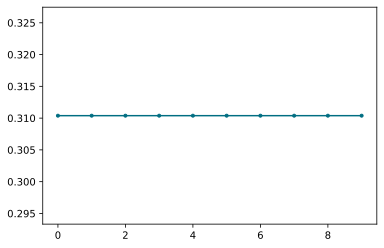

In [104]:
plt.plot(tmp,'.-')

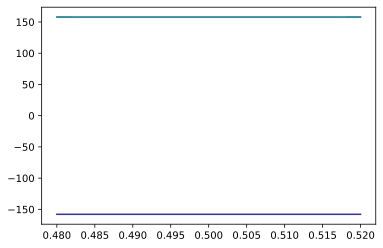

In [84]:
plt.plot(ph_list,scan)
plt.plot(ph_list,-np.array(scan))

## Quasi-energy spectrum

In [4]:
sx = qt.sigmax()
sy = qt.sigmay()
sz = qt.sigmaz()

DD_protocols = {'Free': [0*qt.identity(2)],
                'UDDy9': [sy,sy,sy,sy,sy,sy,sy,sy,sy],
                'Chiral': [sy],
                'SH': [sy,-sy],
                'sCPMG': [sy,sy,-sy,-sy],
                'EDD': [sx,sy,sx,sy,sy,sx,sy,sx],
                'XY4': [sy,sx,sy,sx],
                'RGA8a': [sx,-sy,sx,-sy,sy,-sx,sy,-sx],
                'RGA4':[-sy,sx,-sy,sx],
                'RGA4p':[-sy,-sx,-sy,-sx],
                'SE': [sx,sy,sx,sy,sy,sx,sy,sx,\
                        -sx,-sy,-sx,-sy,-sy,-sx,-sy,-sx]
                  }

error = {}
for prot in tqdm(list(DD_protocols.keys())):
    ops = DD_protocols[prot]

    dt_aux = 0.1
    T = 10*dt_aux
    omega = 2*np.pi/T
    t_pulse = np.linspace(0,T,len(ops))
    d_prms = [np.pi/(2*dt_aux), dt_aux, T, ops,t_pulse]

    scan = []
    ph_list = np.linspace(0.48,0.52,100)
    for ph in tqdm(ph_list):

        evecs, evals = qims.FloquetSpectrum('fluxonium', \
                                            q_prms=[150, ph], \
                                            d_prms = d_prms,\
                                            nsteps = 20000)
        scan.append(np.sort(evals))
    scan = np.array(scan)
    error[prot, dt_aux, T] = (scan, np.sum(np.abs(np.diff(scan.T[0]))))

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
error[prot, dt_aux, T][1]

Free 1.3594167634431926
UDDy9 0.605958976818634
Chiral 0.8150843782434001
SH 1.3594167634431937
sCPMG 1.3594167634431933
EDD 0.2039832554405736
XY4 0.5208561441171429
RGA8a 1.359416763442821
RGA4 0.5208561441171429
RGA4p 0.20348069074490538
SE 1.359416763443255


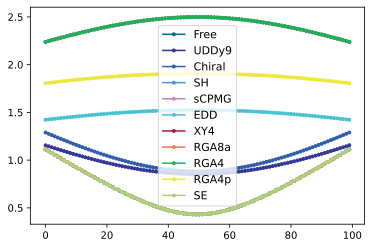

In [5]:
scan = []
for prot in list(DD_protocols.keys()):
    
    ops = DD_protocols[prot]

    dt_aux = 0.1
    T = 10*dt_aux
    
    
    # plt.plot(error[prot, dt_aux, T][1],label = prot)
    scan.append(np.sum(np.abs(np.diff(error[prot, dt_aux, T][0].T[0]))))
    plt.plot(-T*np.array(error[prot, dt_aux, T][0]).T[0],'.-',label = prot);
    # plt.plot(np.array(error[prot, dt_aux, T][0]).T[1],'.-');
    print(prot,np.sum(np.abs(np.diff(error[prot, dt_aux, T][0].T[0]))))
plt.legend()
# plt.show()

In [ ]:
np.sum(np.abs(np.diff(error['RGA4p', dt_aux, T][0].T[0])))

In [ ]:
tune_tmon = scq.TunableTransmon(
   EJmax=50.0,
   EC=0.5,
   d=0.01,
   flux=0.0,
   ng=0.0,
   ncut=30
)

In [ ]:
scq.GUI()

In [ ]:
qt.Qobj(tune_tmon.hamiltonian())

In [ ]:
error[prot, dt_aux, T][0].T[0]

In [10]:
scq.GUI()

Output(layout=Layout(width='100%'))

In [9]:
qt.Qobj(tune_tmon.hamiltonian())

Quantum object: dims = [[61], [61]], shape = (61, 61), type = oper, isherm = True
Qobj data =
[[1800.  -25.    0. ...    0.    0.    0.]
 [ -25. 1682.  -25. ...    0.    0.    0.]
 [   0.  -25. 1568. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ... 1568.  -25.    0.]
 [   0.    0.    0. ...  -25. 1682.  -25.]
 [   0.    0.    0. ...    0.  -25. 1800.]]

In [ ]:
error[prot, dt_aux, T][0].T[0]

In [ ]:
f, ax = plt.subplots()

x = list(DD_protocols.keys())
l = np.arange(0,len(DD_protocols))

ax.plot(l,scan,'r.-')
ax.set_xticks(l)
ax.set_xticklabels(x);
ax.grid()
ax.set_title('width = '+str(dt_aux)+'ns,    period = '+str(T)+"ns")

In [ ]:
f, ax = plt.subplots()

x = list(DD_protocols.keys())
l = np.arange(0,len(DD_protocols))

ax.plot(l,scan,'r.-')
ax.set_xticks(l)
ax.set_xticklabels(x);
ax.grid()

In [65]:
error[prot, dt_aux, T][0].T[0]

array([-1.1119336 , -1.06371844, -1.01593235, -0.96863883, -0.92191369,
       -0.8758479 , -0.83055116, -0.78615644, -0.74282547, -0.70075563,
       -0.66018803, -0.62141696, -0.58479984, -0.55076647, -0.51982455,
       -0.49255705, -0.46960447, -0.45162516, -0.43923028, -0.43289977,
       -0.43289977, -0.43923028, -0.45162516, -0.46960447, -0.49255705,
       -0.51982455, -0.55076647, -0.58479984, -0.62141696, -0.66018803,
       -0.70075563, -0.74282547, -0.78615644, -0.83055116, -0.87584789,
       -0.92191368, -0.96863883, -1.01593235, -1.06371844, -1.1119336 ])

Text(0.5, 1.0, 'width = 0.1ns,    period = 1.0ns')

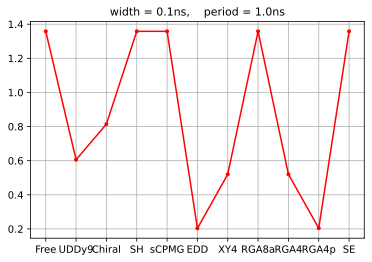

In [82]:
f, ax = plt.subplots()

x = list(DD_protocols.keys())
l = np.arange(0,len(DD_protocols))

ax.plot(l,scan,'r.-')
ax.set_xticks(l)
ax.set_xticklabels(x);
ax.grid()
ax.set_title('width = '+str(dt_aux)+'ns,    period = '+str(T)+"ns")

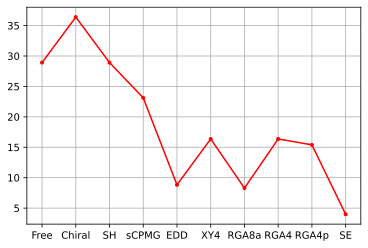

In [42]:
f, ax = plt.subplots()

x = list(DD_protocols.keys())
l = np.arange(0,len(DD_protocols))

ax.plot(l,scan,'r.-')
ax.set_xticks(l)
ax.set_xticklabels(x);
ax.grid()

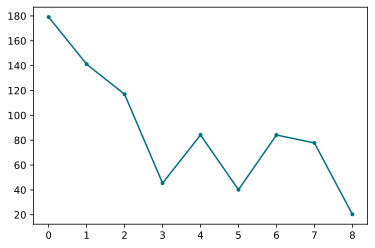

In [25]:
plt.plot(scan,'.-')

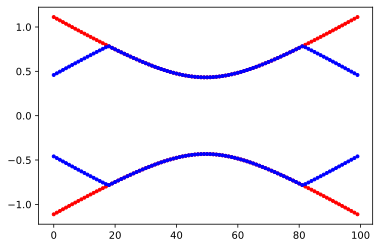

In [131]:
plt.plot(np.array(scan0).T[0],'r.-');
plt.plot(np.array(scan0).T[1],'r.-');

plt.plot(np.array(scan).T[0],'b.-');
plt.plot(np.array(scan).T[1],'b.-');

In [ ]:
def qubit_hamiltonian(qb, prms):
    """
        a
    :param qb:
    :return:
    """
    if qb == 'fluxonium':
        fluxonium = scq.Fluxonium(EJ=4,
                                  EC=0.5,
                                  EL=1.3,
                                  flux=0.5,
                                  cutoff=prms[0])

        # Setup of fluxonium qubit
        evals, evecs = fluxonium.eigensys()
        gst = qt.Qobj(evecs.T[0])
        est = qt.Qobj(evecs.T[1])
        Delta = evals[1] - evals[0]

        ph_ext = prms[1]
        B = 2 * 2 * np.pi * (ph_ext - 0.5) * fluxonium.EL * np.abs(
            (est.dag() * qt.Qobj(fluxonium.phi_operator()) * gst).full()[0, 0])
        H0 = (Delta / 2) * sx + (B / 2) * sz

    return H0

def Kick_X(t, args):


    return args['amplitude'] * (1 / (np.sqrt(2 * np.pi))) * np.e ** (-((t - 0.5*args['period'] - np.floor(t / args['period']) * args['period']) ** 2) / (
            2 * args['width'] ** 2))

dt_aux = 10
T = 15*dt_aux
omega = 2*np.pi/T

sx = qt.sigmax()
sy = qt.sigmay()
sz = qt.sigmaz()


args = {'amplitude': np.pi/(2*dt_aux), 'width': dt_aux, 'period': T}

ph_list = np.linspace(0,2*np.pi,50)
scan = []

for ph in tqdm(ph_list):
    HFloquet = [0.001*np.cos(ph)* sz, \
                    [sx, lambda t, args: Kick_X(t, args)]]
    # HFloquet = [[sx, lambda t, args: Kick_X(t, args)]]
    U = qt.propagator(HFloquet, T, c_op_list=[], args=args)
    # print(((1j)*U*sx-qt.identity(2)).norm())
    scan.append(((1j)*U*sx-qt.identity(2)).norm())

In [ ]:
plt.plot(ph_list/np.pi,scan,'.-')

In [ ]:
plt.plot(np.array(scannorm.T[0],'.-');
plt.plot(np.array(scan).T[1]);

In [ ]:
scan

In [ ]:
plt.plot(ph_list,scan.T[0]/omega,'.-');
plt.plot(ph_list,scan.T[1]/omega,'.-');
plt.ylim([-0.5,0.5])

In [ ]:
reload(qf)

ph_list = np.linspace(0.48,0.52,40)

dt_list = np.linspace(0.001,1,10)

err = []
for dt in tqdm(dt_list):
    scan = []
    T = 20*dt
    omega = 2*np.pi/T

    for ph in ph_list:
        evecs, evals = qf.FloquetSpectrum('fluxonium',q_prms = [150,ph],d_prms = [np.pi/(2*dt),dt,T])
        scan.append(np.sort(evals))
    scan = np.array(scan)
    # derr=np.sum(np.abs(np.diff(scan.T[0])))
    derr = T*np.abs(np.max(scan.T[0])\
                  -np.min(scan.T[0]))
    err.append(derr)
    plt.title('Period factor = '+str(np.round(T/dt,decimals = 2)))
    plt.plot(ph_list,T*scan.T[0],'.-',label = str(np.round(dt,decimals = 2))+' '+str(np.round(derr, decimals = 3)));
    # plt.plot(ph_list,scan.T[1],'.-',label = str(dt));
    plt.legend(loc="upper left")
    plt.ylim([-np.pi,0]);
plt.savefig('Fig_'+str(np.round(T/dt,decimals = 2))+'.pdf')

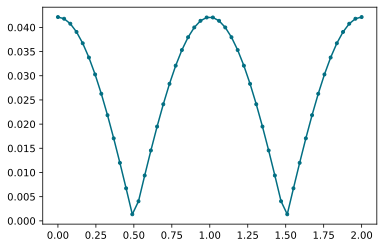

In [232]:
plt.plot(ph_list/np.pi,scan,'.-')

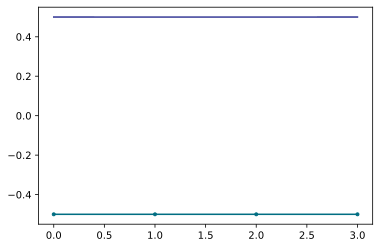

In [177]:
plt.plot(np.array(scannorm.T[0],'.-');
plt.plot(np.array(scan).T[1]);

(-0.5, 0.5)

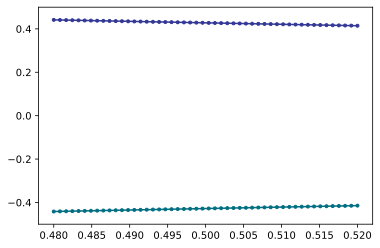

In [69]:
plt.plot(ph_list,scan.T[0]/omega,'.-');
plt.plot(ph_list,scan.T[1]/omega,'.-');
plt.ylim([-0.5,0.5])

  0%|          | 0/10 [00:00<?, ?it/s]

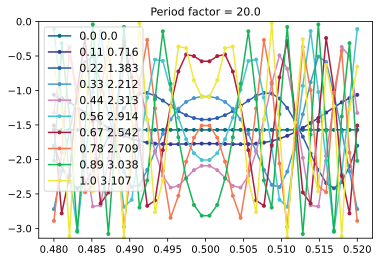

In [5]:
reload(qf)

ph_list = np.linspace(0.48,0.52,40)

dt_list = np.linspace(0.001,1,10)

err = []
for dt in tqdm(dt_list):
    scan = []
    T = 20*dt
    omega = 2*np.pi/T

    for ph in ph_list:
        evecs, evals = qf.FloquetSpectrum('fluxonium',q_prms = [150,ph],d_prms = [np.pi/(2*dt),dt,T])
        scan.append(np.sort(evals))
    scan = np.array(scan)
    # derr=np.sum(np.abs(np.diff(scan.T[0])))
    derr = T*np.abs(np.max(scan.T[0])\
                  -np.min(scan.T[0]))
    err.append(derr)
    plt.title('Period factor = '+str(np.round(T/dt,decimals = 2)))
    plt.plot(ph_list,T*scan.T[0],'.-',label = str(np.round(dt,decimals = 2))+' '+str(np.round(derr, decimals = 3)));
    # plt.plot(ph_list,scan.T[1],'.-',label = str(dt));
    plt.legend(loc="upper left")
    plt.ylim([-np.pi,0]);
plt.savefig('Fig_'+str(np.round(T/dt,decimals = 2))+'.pdf')

In [ ]:
scan.T[0]

In [ ]:
plt.plot(err,'.-')

In [ ]:
plt.plot(err,'.-')

In [ ]:
plt.plot(err,'.-')

In [ ]:
plt.plot(ph_list,scan.T[0],'.-');
# plt.plot(ph_list,scan.T[1],'.-');
# plt.ylim([-5,5])

In [ ]:
reload(qop)

ph_list = np.linspace(0.48,0.52,40)

dt_list = np.linspace(0.001,1,10)

err = []
for dt in tqdm(dt_list):
    scan = []
    T = 20*dt
    omega = 2*np.pi/T

    for ph in ph_list:
        evecs, evals = qop.FloquetSpectrum('fluxonium',q_prms = [150,ph],d_prms = [np.pi/(2*dt),dt,T])
        scan.append(np.sort(evals))
    scan = np.array(scan)
    # derr=np.sum(np.abs(np.diff(scan.T[0])))
    derr = T*np.abs(np.max(scan.T[0])\
                  -np.min(scan.T[0]))
    err.append(derr)
    plt.title('Period factor = '+str(np.round(T/dt,decimals = 2)))
    plt.plot(ph_list,T*scan.T[0],'.-',label = str(np.round(dt,decimals = 2))+' '+str(np.round(derr, decimals = 3)));
    # plt.plot(ph_list,scan.T[1],'.-',label = str(dt));
    plt.legend(loc="upper left")
    plt.ylim([-np.pi,0]);
plt.savefig('Fig_'+str(np.round(T/dt,decimals = 2))+'.pdf')

In [ ]:
scan.T[0]

In [ ]:
plt.plot(err,'.-')

In [ ]:
plt.plot(err,'.-')

In [ ]:
plt.plot(err,'.-')

In [ ]:
plt.plot(ph_list,scan.T[0],'.-');
plt.plot(ph_list,scan.T[1],'.-');
plt.ylim([-5,5])

In [ ]:
plt.plot(ph_list,scan.T[0],'.-');
plt.plot(ph_list,scan.T[1],'.-');
plt.ylim([-5,5])

In [ ]:
plt.plot(ph_list,scan.T[0],'.-');
plt.plot(ph_list,scan.T[1],'.-');
# plt.ylim([-np.pi/T,np.pi/T])

In [ ]:
np.pi/(2*1)

In [ ]:
plt.plot(err,'.-')

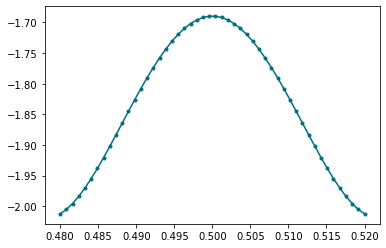

In [62]:
plt.plot(ph_list,scan.T[0],'.-');
# plt.plot(ph_list,scan.T[1],'.-');
# plt.ylim([-5,5])

  0%|          | 0/10 [00:00<?, ?it/s]

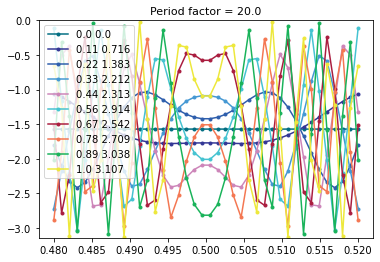

In [92]:
reload(qop)

ph_list = np.linspace(0.48,0.52,40)

dt_list = np.linspace(0.001,1,10)

err = []
for dt in tqdm(dt_list):
    scan = []
    T = 20*dt
    omega = 2*np.pi/T

    for ph in ph_list:
        evecs, evals = qop.FloquetSpectrum('fluxonium',q_prms = [150,ph],d_prms = [np.pi/(2*dt),dt,T])
        scan.append(np.sort(evals))
    scan = np.array(scan)
    # derr=np.sum(np.abs(np.diff(scan.T[0])))
    derr = T*np.abs(np.max(scan.T[0])\
                  -np.min(scan.T[0]))
    err.append(derr)
    plt.title('Period factor = '+str(np.round(T/dt,decimals = 2)))
    plt.plot(ph_list,T*scan.T[0],'.-',label = str(np.round(dt,decimals = 2))+' '+str(np.round(derr, decimals = 3)));
    # plt.plot(ph_list,scan.T[1],'.-',label = str(dt));
    plt.legend(loc="upper left")
    plt.ylim([-np.pi,0]);
plt.savefig('Fig_'+str(np.round(T/dt,decimals = 2))+'.pdf')

In [72]:
scan.T[0]

array([-6.41290338, -6.34728904, -6.2883802 , -6.23637534, -6.19145135,
       -6.15376443, -6.12344851, -6.10061332, -6.08534265, -6.07769983,
       -6.0777006 , -6.08534265, -6.10061324, -6.12344828, -6.15376397,
       -6.19145067, -6.23637453, -6.28837956, -6.34728937, -6.41290689])

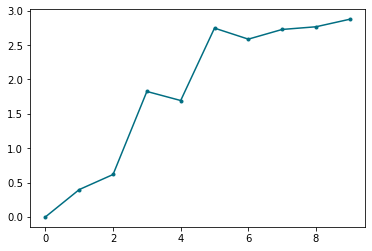

In [88]:
plt.plot(err,'.-')

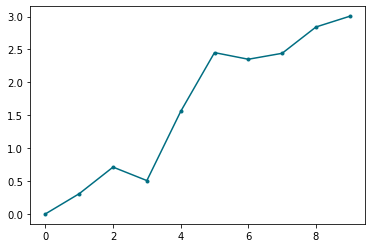

In [86]:
plt.plot(err,'.-')

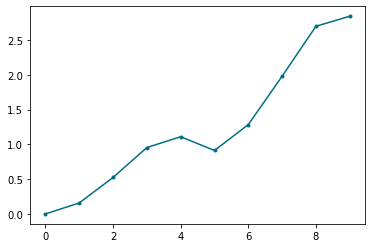

In [90]:
plt.plot(err,'.-')

(-5.0, 5.0)

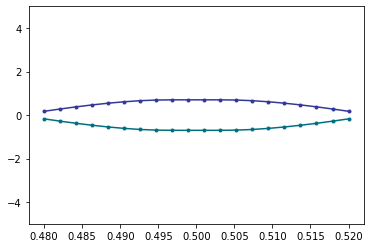

In [15]:
plt.plot(ph_list,scan.T[0],'.-');
plt.plot(ph_list,scan.T[1],'.-');
plt.ylim([-5,5])

(-5.0, 5.0)

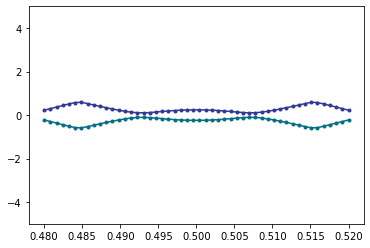

In [18]:
plt.plot(ph_list,scan.T[0],'.-');
plt.plot(ph_list,scan.T[1],'.-');
plt.ylim([-5,5])

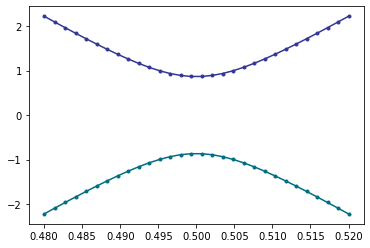

In [518]:
plt.plot(ph_list,scan.T[0],'.-');
plt.plot(ph_list,scan.T[1],'.-');
# plt.ylim([-np.pi/T,np.pi/T])

In [516]:
np.pi/(2*1)

1.5707963267948966

(-0.15393804002589986, 0.15393804002589986)

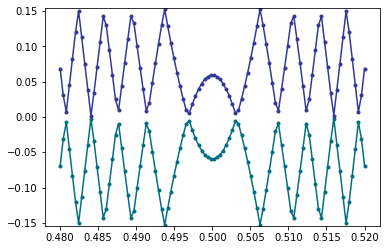

In [295]:
plt.plot(ph_list,scan.T[0],'.-');
plt.plot(ph_list,scan.T[1],'.-');
plt.ylim([-np.pi/T,np.pi/T])

## Deviation from flatness: amplitude vs width

In [164]:
reload(qop)

T = 2*1/(0.49)
omega = 2*np.pi/T

ph_list = np.linspace(0.48,0.52,20)
amp_list = np.linspace(0,1.01*np.pi,20)
dt_list = np.linspace(0.015,0.1,20)

err = []
for amp in tqdm(amp_list):
    err_temp = []
    for dt in dt_list:
        scan = []
        for ph in ph_list:
            evecs, evals = qop.FloquetSpectrum('fluxonium',q_prms = [150,ph],d_prms = [amp,dt,T])
            scan.append(np.sort(evals))
        scan = np.array(scan)
        err_temp.append(np.sum(np.abs(np.diff(scan.T[0]))))
    err.append(err_temp)

  0%|          | 0/20 [00:00<?, ?it/s]

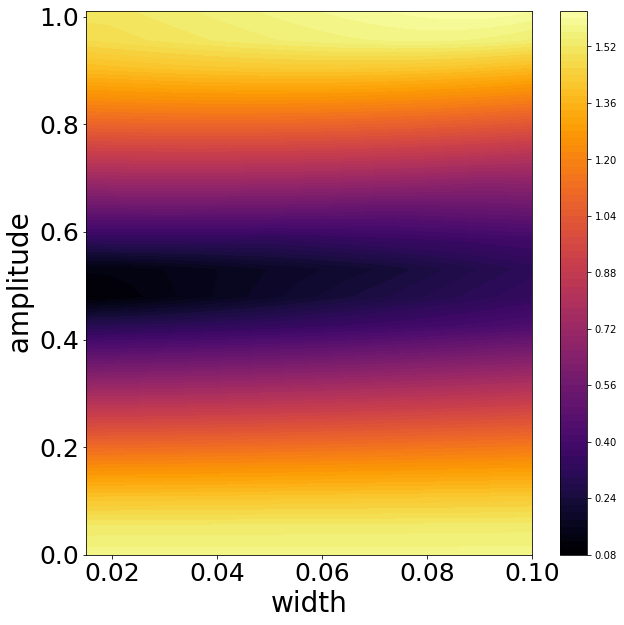

In [165]:
import matplotlib.lines as lines
fig, ax = plt.subplots(figsize=(10,10))

X, Y = np.meshgrid(dt_list,amp_list/np.pi)
cont0 = ax.contourf(X,Y ,err, 100,cmap = "inferno")


ax.set_ylabel(r" amplitude ",size = 28)

ax.set_xlabel(r'width',size = 28)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)


fig.colorbar(cont0, ax=ax, format = "%.2f")
# fig.tight_layout()

## Deviation from flatness: width vs period

In [206]:
## Deviation from flatness: amplitude vs width
reload(qop)



ph_list = np.linspace(0.48, 0.52, 10)
T_list = np.linspace(0.1, 20, 30)
dt_list = np.linspace(0.015, 0.1, 10)

err = []
Amplitude = 1 #GHz
for Tmp in tqdm(T_list):
    err_temp = []
    for dt in dt_list:
        scan = []
        for ph in ph_list:
            evecs, evals = qop.FloquetSpectrum('fluxonium', q_prms=[150, ph], d_prms=[Amplitude, dt, Tmp])
            scan.append(np.sort(evals))
        scan = np.array(scan)
        T = Tmp
        omega = 2 * np.pi / T
        err_temp.append(np.sum(np.abs(np.diff(scan.T[0]))) / omega)
    err.append(err_temp)


  0%|          | 0/30 [00:00<?, ?it/s]

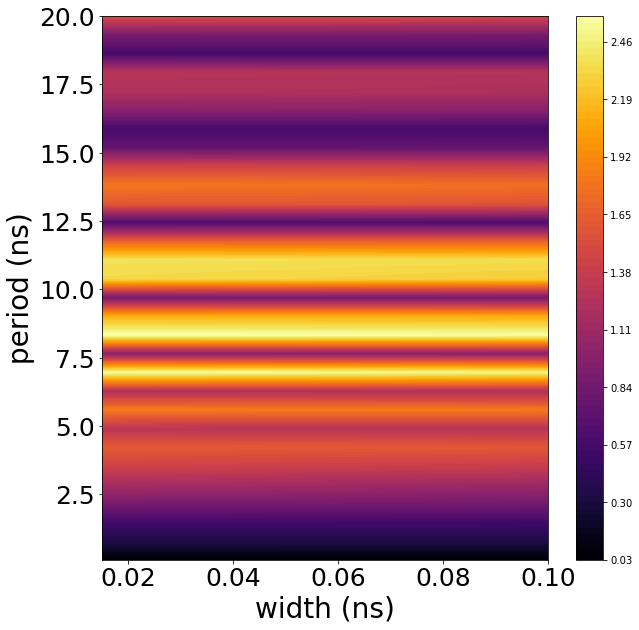

In [207]:

fig, ax = plt.subplots(figsize=(10, 10))

X, Y = np.meshgrid(dt_list, T_list)
cont0 = ax.contourf(X, Y, err, 100, cmap="inferno")

ax.set_ylabel(r" period (ns) ", size=28)

ax.set_xlabel(r'width (ns)', size=28)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

fig.colorbar(cont0, ax=ax, format="%.2f")
# fig.tight_layout()

## Deviation from flatness: amplitude vs period

In [331]:
## Deviation from flatness: amplitude vs width
reload(qop)
dt_aux = 0.1 #ns
ph_list = np.linspace(0.48, 0.52, 10)
amp_list = np.linspace(0,20,20)
T_list = np.linspace(10*dt, 20, 100) #Period should be greater than pulse width
options = qt.Options()
options.nsteps = 100000
err = []

err_temp = []
for Tmp in tqdm(T_list):

    scan = []
    for ph in ph_list:
        evecs, evals = qop.FloquetSpectrum('fluxonium', q_prms=[150, ph], d_prms=[0, dt_aux, Tmp])
        scan.append(np.sort(evals))
    scan = np.array(scan)
    T = Tmp
    omega = 2 * np.pi / T
    # plt.plot(scan)
    # err_temp.append(np.mean(np.abs(np.diff(scan.T[0])))/np.mean(np.diff(ph_list)))
    e1 = np.abs(np.max(scan.T[0])-np.min(scan.T[0]))
    e2 = np.abs(np.max(scan.T[0])-np.min(scan.T[0]))
    err_temp.append()

  0%|          | 0/100 [00:00<?, ?it/s]

(0.0, 1.5)

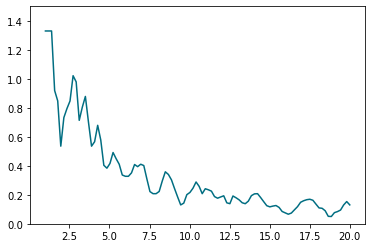

In [335]:
plt.plot(T_list,err_temp)
plt.ylim([0,1.5])

In [509]:
## Deviation from flatness: amplitude vs width
reload(qop)
dt_aux = 0.5 #ns
ph_list = np.linspace(0.48, 0.52, 70)
amp_list = np.linspace(0.5*np.pi/(2*dt_aux),2*np.pi/(2*dt_aux),10)
T_list = np.linspace(0.01*dt_aux, 20*dt_aux, 10) #Period should be greater than pulse width
options = qt.Options()
options.nsteps = 10000000
err = []

for Tmp in tqdm(T_list):
    err_temp = []
    for Amp in amp_list:
        scan = []
        for ph in ph_list:
            evecs, evals = qop.FloquetSpectrum('fluxonium', q_prms=[150, ph], d_prms=[Amp, dt_aux, Tmp])
            scan.append(np.sort(evals))
        scan = np.array(scan)
        T = Tmp
        omega = 2 * np.pi / T
        err_temp.append(np.mean(np.abs(np.diff(scan.T[0])))/np.mean(np.diff(ph_list)))
    err.append(err_temp)

  0%|          | 0/10 [00:00<?, ?it/s]

In [461]:
np.pi/(2*dt_aux)

3.141592653589793

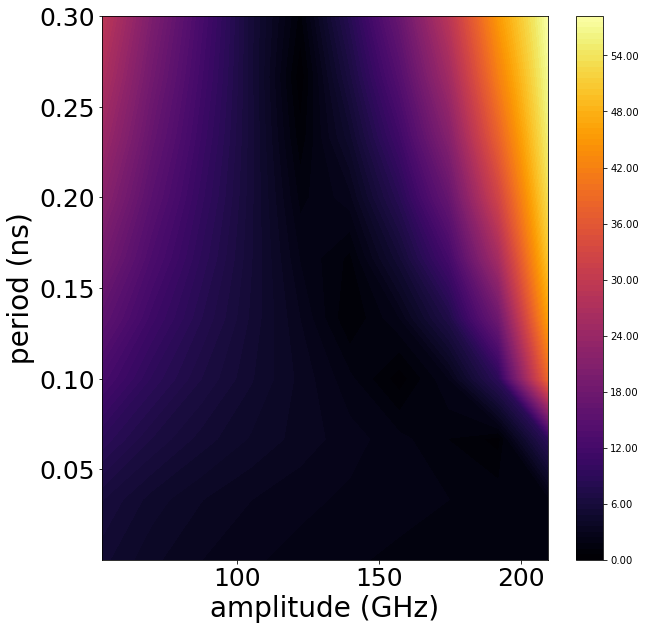

In [507]:
from matplotlib import ticker, cm
fig, ax = plt.subplots(figsize=(10, 10))

X, Y = np.meshgrid(amp_list, T_list)
cont0 = ax.contourf(X, Y, err, 100,
                    cmap
                    ="inferno")

ax.set_ylabel(r" period (ns) ", size=28)

ax.set_xlabel(r'amplitude (GHz)', size=28)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

fig.colorbar(cont0, ax=ax, format="%.2f")


# fig.tight_layout()

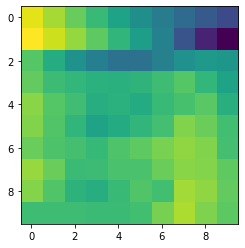

In [511]:
plt.imshow(err)

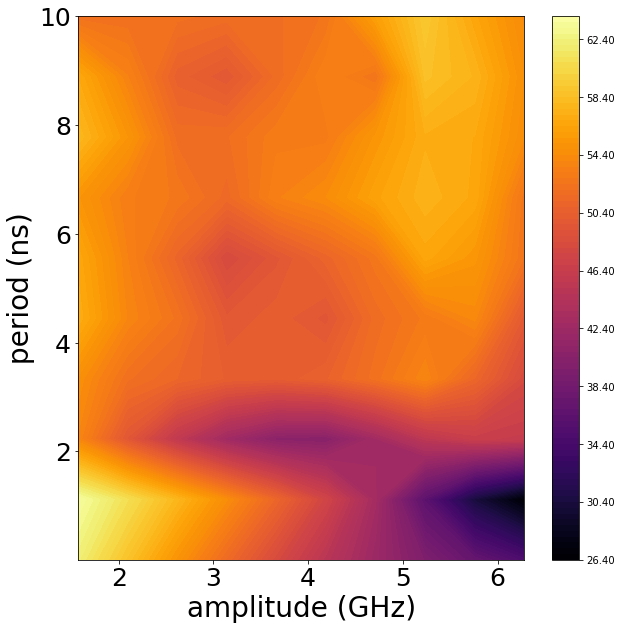

In [510]:
from matplotlib import ticker, cm
fig, ax = plt.subplots(figsize=(10, 10))

X, Y = np.meshgrid(amp_list, T_list)
cont0 = ax.contourf(X, Y, err, 100,
                    cmap
                    ="inferno")

ax.set_ylabel(r" period (ns) ", size=28)

ax.set_xlabel(r'amplitude (GHz)', size=28)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

fig.colorbar(cont0, ax=ax, format="%.2f")


# fig.tight_layout()

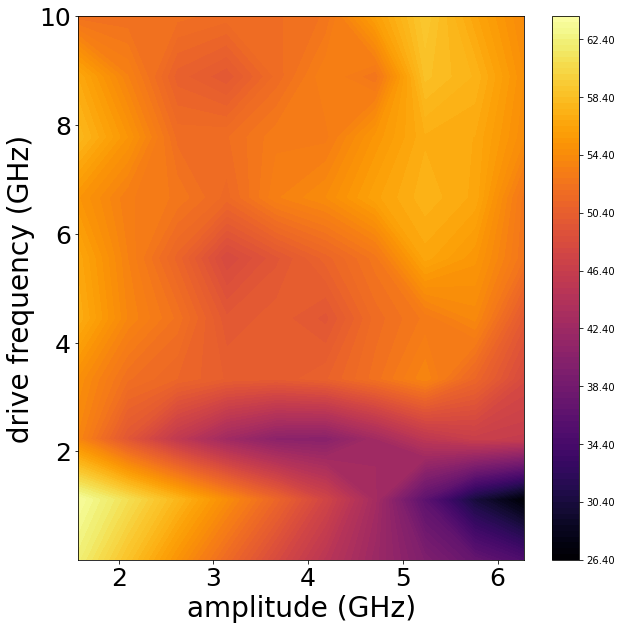

In [504]:
from matplotlib import ticker, cm
fig, ax = plt.subplots(figsize=(10, 10))

X, Y = np.meshgrid(amp_list, T_list)
cont0 = ax.contourf(X, Y, err, 100,
                    cmap
                    ="inferno")

ax.set_ylabel(r" drive frequency (GHz) ", size=28)

ax.set_xlabel(r'amplitude (GHz)', size=28)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

fig.colorbar(cont0, ax=ax, format="%.2f")


# fig.tight_layout()

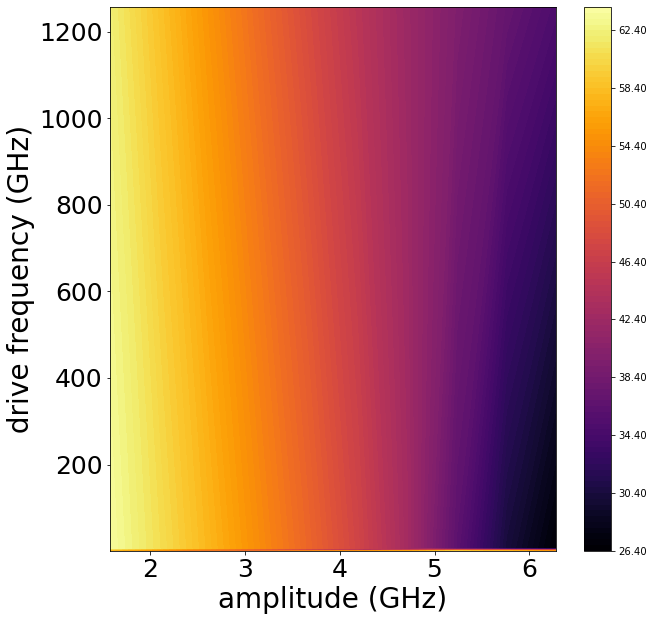

In [505]:
from matplotlib import ticker, cm
fig, ax = plt.subplots(figsize=(10, 10))

X, Y = np.meshgrid(amp_list, 2*np.pi/T_list)
cont0 = ax.contourf(X, Y, err, 100,
                    cmap
                    ="inferno")

ax.set_ylabel(r" drive frequency (GHz) ", size=28)

ax.set_xlabel(r'amplitude (GHz)', size=28)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

fig.colorbar(cont0, ax=ax, format="%.2f")


# fig.tight_layout()

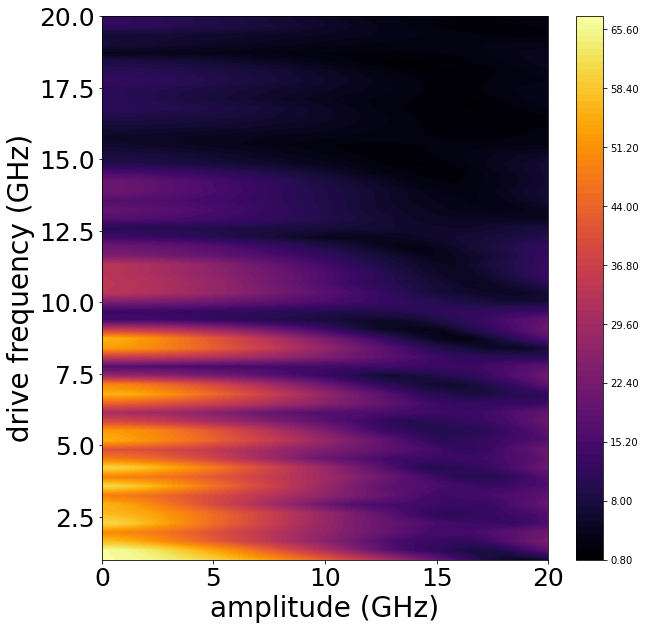

In [302]:
from matplotlib import ticker, cm
fig, ax = plt.subplots(figsize=(10, 10))

X, Y = np.meshgrid(amp_list, T_list)
cont0 = ax.contourf(X, Y, err, 100,
                    cmap
                    ="inferno")

ax.set_ylabel(r" drive frequency (GHz) ", size=28)

ax.set_xlabel(r'amplitude (GHz)', size=28)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

fig.colorbar(cont0, ax=ax, format="%.2f")


# fig.tight_layout()

TypeError: Invalid shape (0,) for image data

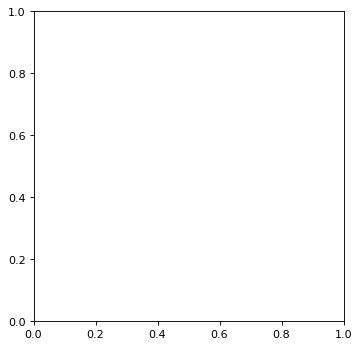

In [336]:
from matplotlib.pyplot import figure

figure(figsize=(5, 20), dpi=80)
plt.imshow(err)

In [ ]:
zz